# Vasicek

In [31]:
# Import neccesary packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
from scipy.stats import norm

In [32]:
# set up input parameters for Zero Coupon Bond
a = -.562                # Mean reversion
rBar = 0.036             # interest rate mean
sigma = .23              # volatitlity
r = 0.0541              # interest rate at time t
optionExpiry = 1         # time to option expiry in years
t = 0                    # calendar date
bondMaturity = 1         # bond maturity time in years
K = 0.67                 # strike price
optionType = "call"      # call or put option
numberSimulations = 2000 # numnber of simulations
steps = 200              # number of steps

In [33]:
# closed form solution Zero Coupon Bond pricing using vasiceck
def closedFormVasicek(r, rBar, a, sigma, t, bondMaturity):
    """
    # compute the price of a Zero Coupon Bond using a closed form black like formula
    Inputs
    # r
    # rBar
    # a
    # sigma
    # t
    # maturity
    
    Output
    # Price of Zero Coupon Bond
    """
    
    B = ((1-np.exp(-(t - bondMaturity)*a))/a)

    A = (rBar-(sigma**2/2*a))*((bondMaturity - t) - B)+(sigma**2/4*a)*B**2
    
    P = math.exp(-A-B*r)

    return(P)

In [34]:
closedFormVasicek(r, rBar, a, sigma, t, bondMaturity)

0.9569153590914693

In [6]:
# Monte Carlo Simulation Using The Vasicek Stochastic Differential Equation
def ZCBpriceSim(r, rBar, a, sigma, bondMaturity, numberSimulations, steps, t):
    """
    #  Compute an array of N simulated price paths (N) using geometric brownian motion
    Inputs
    # r
    # rBar
    # a
    # sigma
    # T
    # numberSimulations
    # steps
    # t
        
    Output
    # [steps,numberSimulations] Matrix of rate paths
    """
   # compute delta t
    dt = bondMaturity / steps  
    
    # define computedR array with zeros
    computedR = np.zeros((numberSimulations, steps-1))
    # insert initial observed r into first column of computedR array
    computedR = np.insert(computedR, 0 , r, axis=1)
    
    for i in range(numberSimulations):
        for j in range(1, steps):
            dr = ((a*(rBar - computedR[i, j-1])*dt) + (sigma*np.random.normal()))
            # since delta r is being calculated we must add delta r to computedR
            computedR[i,j] = computedR[i,j-1] + dr
            
    return computedR

In [7]:
def callPutPricingBlackFormula(r, rBar, a, sigma, t, bondMaturity, optionExpiry, K, optionType):
    ''' 
    #   compute prices for european calls and puts on pure discount bonds
        using black like formula. Jamshidian(1989)
    Inputs
    # r
    # rBar
    # a
    # sigma
    # t
    # bondMaturity
    # optionExpiry
    # K
    # optionType
    
    Output
    # price of a european call or put on a pure discount bond
    '''
  
    # compute constants
    ZCB_Price_timet_maturityS = closedFormVasicek(r, rBar, a, sigma, t, bondMaturity)
    ZCB_Price_timet_maturityT = closedFormVasicek(r, rBar, a, sigma, t, optionExpiry)
    vega_t_optionExpiry = np.sqrt( ((sigma**2)*(1-(np.exp(-2*a*(optionExpiry - t))))) / (2*a) )
    sigmaP = (vega_t_optionExpiry * (1 - (np.exp(-a*(bondMaturity - optionExpiry))))) / a
    d1 = (np.log((ZCB_Price_timet_maturityS / (K*ZCB_Price_timet_maturityT))) / sigmaP) + (sigmaP/2)
    d2 = d1 - sigmaP
    
    if optionType == "call":
        optionPrice = ZCB_Price_timet_maturityS*norm.cdf(d1) - K*ZCB_Price_timet_maturityT*norm.cdf(d2)
    elif optionType == "put":
        optionPrice = K*ZCB_Price_timet_maturityT*norm.cdf(-d2) - ZCB_Price_timet_maturityS*norm.cdf(-d1)
    else:
        print("This function only calculates european calls and puts on pure discount bonds")
        
    return optionPrice

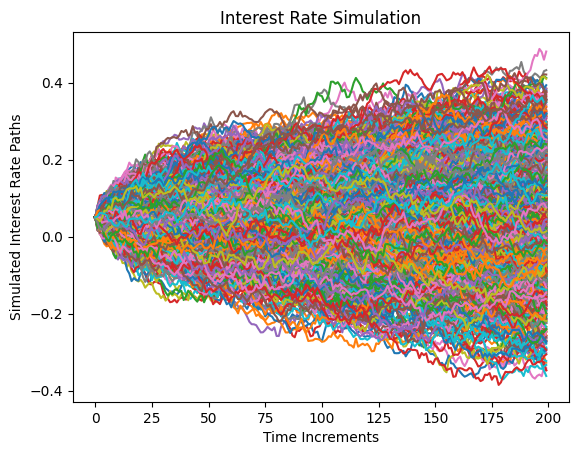

the simulated price of the ZCB is: 0.9623572276271531
the closed form solution price of the ZCB is: 0.951240103688516
percent error: -1.1686979865051488


In [8]:
# run monte carlo simulation

# compute paths
paths = ZCBpriceSim(r, rBar, a, sigma, bondMaturity, numberSimulations, steps, t)

# Plot the paths and setup titles
plt1.plot(paths.T)
plt1.xlabel("Time Increments")
plt1.ylabel("Simulated Interest Rate Paths")
plt1.title("Interest Rate Simulation")

plt1.show()


# Monte Carlo Simulation Price = average of all final values
simulationPrice = np.average(np.exp(-paths[:,-1]*(bondMaturity)))
print("the simulated price of the ZCB is:", simulationPrice)
print("the closed form solution price of the ZCB is:", closedFormVasicek(r, rBar, a, sigma, t, bondMaturity))

# calculate percent error
percentError = ((closedFormVasicek(r, rBar, a, sigma, t, bondMaturity) - simulationPrice)/(closedFormVasicek(r, rBar, a, sigma, t, bondMaturity)))*100

print("percent error:", percentError)

In [9]:
# re-define input parameters for Zero Coupon Bond
a = .15                  # Mean reversion
rBar = .05               # interest rate mean
sigma = .01              # volatitlity
r = .05                  # interest rate at time t
optionExpiry = 1         # time to option expiry in years
t = 0                    # calendar date
bondMaturity = 5         # bond maturity time in years
K = 0.67                 # strike price
optionType = "call"      # call or put option
numberSimulations = 2000 # numnber of simulations
steps = 200              # number of steps

In [10]:
# calculate options price
optionPrice = callPutPricingBlackFormula(r, rBar, a, sigma, t, bondMaturity, optionExpiry, K, optionType)
print("the price of a european", optionType, "expiring in", optionExpiry, "years, on zero coupon bond with maturity", bondMaturity, "years, is", optionPrice)

the price of a european call expiring in 1 years, on zero coupon bond with maturity 5 years, is 0.14138066956769046
